# [Jupyter Notebook ](https://ru.hexlet.io/courses/jupyter-notebook)

## [Испытания](https://ru.hexlet.io/courses/jupyter-notebook#challenges)

### [Активность пользователей ](https://ru.hexlet.io/challenges/jupyter_notebook_user_activity_exercise)



In [219]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [215]:
def action_distribution(df):
    unique_id_count = df['user_id'].nunique()
    grouped = df.groupby('action')['action'].count() / unique_id_count
    grouped.to_json('actions.json')
    return grouped


def time_spent_distribution(df):
    grouped_by_time_spent = df.groupby('user_id')['time_spent'].sum()
    id_quartile_labels = pd.qcut(grouped_by_time_spent, 4, labels=['Low', 'Below Average', 'Above Average', 'High'])
    quartile_df = pd.DataFrame({'time_spent': grouped_by_time_spent, 'quartile_labels': id_quartile_labels})
    grouped_by_quartile_labels = quartile_df.groupby('quartile_labels')['time_spent'].count()
    grouped_by_quartile_labels.to_json('time_spent.json')
    return grouped_by_quartile_labels

In [171]:
path = './data/user_activity.csv'

In [173]:
df = pd.read_csv(path)

In [175]:
df.head()

,Unnamed: 0,user_id,action,time_spent
0,0,12,View,4.27
1,1,50,View,4.21
2,2,16,Purchase,2.49
3,3,7,Open,2.47
4,4,92,View,10.22


In [239]:
avg_action_counts = action_distribution(df)
action_distribution_series

action
Open        3.064103
Purchase    1.461538
View        1.884615
Name: action, dtype: float64

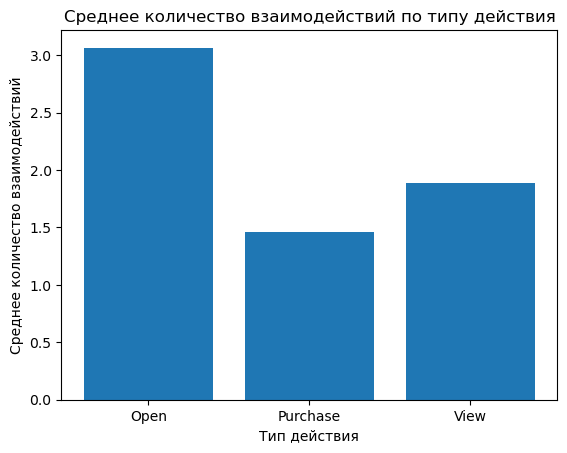

In [241]:
plt.bar(avg_action_counts.index, avg_action_counts.values)
plt.title("Среднее количество взаимодействий по типу действия")
plt.ylabel("Среднее количество взаимодействий")
plt.xlabel("Тип действия")
plt.show()

In [243]:
avg_time_spent_by_quartile = time_spent_distribution(df)
avg_time_spent_by_quartile

/tmp/ipykernel_454668/4153822123.py:12: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_by_quartile_labels = quartile_df.groupby('quartile_labels')['time_spent'].count()


quartile_labels
Low              20
Below Average    19
Above Average    19
High             20
Name: time_spent, dtype: int64

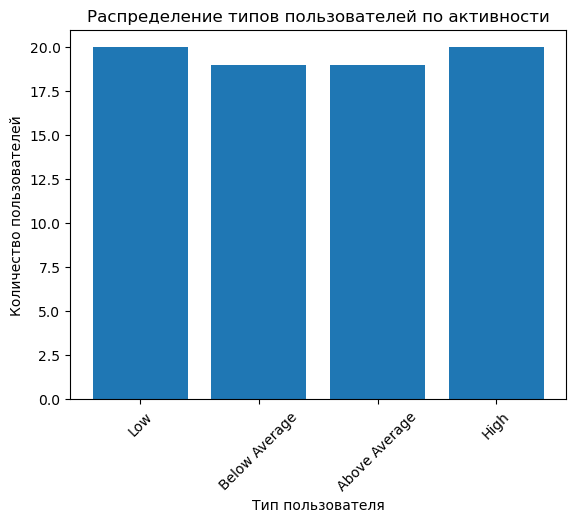

In [245]:
plt.bar(avg_time_spent_by_quartile.index, avg_time_spent_by_quartile.values)
plt.title("Распределение типов пользователей по активности")
plt.ylabel("Количество пользователей")
plt.xlabel("Тип пользователя")
plt.xticks(rotation=45)
plt.show()